Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [1]:
NAME = "Jennifer Luu"

---

# Homework 9

Run the code given below to create 400 simulated 2-dimensional observations ```X``` and corresponding true labels ```y_true```. True labels range from 0 to 3. 

Also, we're creating a scatterplot of the data and indicating group membership by use of the four colors magenta (group 0), green (group 1), yellow (group 2), blue (group 3), respectively. 

C:\Users\Jen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


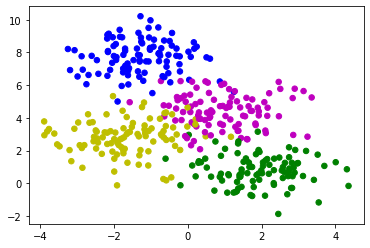

In [2]:
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=400, centers=4,
                                  cluster_std=1, center_box=(-10.0, 10.0), random_state=0) 

fig, axe = plt.subplots()
colors = ('m', 'g', 'y', 'b')
axe.scatter(X[:, 0], X[:, 1], c = [colors[y_true[i]] for i in range(len(y_true))], s=30); 

## Problem 1

(a) Consider the data (X,y_true) that were simulated above to be your training data. Use the Gaussian Naive Bayes algorithm to predict the label color of the point x with coordinates (0,4) "by-hand". Show your work. You can compute multivariate normal densities using the ```scipy.stats``` module or by using your calculator. Please state which method you used in your answer.  

Optional code box:

In [3]:
# YOUR CODE HERE
import numpy as np
from scipy import stats

#X matrix: the training data with 2 features (2-dimensional)
#target vector: the labels that correspond to the groups 

#count in target vector how many labels and compute the percentage of them
n = sum(y_true)
P_L0 = sum(y_true==0)/n
P_L1 = sum(y_true==1)/n
P_L2 = sum(y_true==2)/n
P_L3 = sum(y_true==3)/n


#use the simulated data to estimate the mean and covariance matrix for 
#each group
S0 = np.cov(X[y_true==0].T)
S1 = np.cov(X[y_true==1].T)
S2 = np.cov(X[y_true==2].T)
S3 = np.cov(X[y_true==3].T)

mu0 = np.mean(X[y_true==0], axis = 0)
mu1 = np.mean(X[y_true==1], axis = 0)
mu2 = np.mean(X[y_true==2], axis = 0)
mu3 = np.mean(X[y_true==3], axis = 0)


#compute conditional probabilities of feature (x, y) given label i 
rv0 = stats.multivariate_normal(mu0, S0).pdf((0,4))
rv1 = stats.multivariate_normal(mu1, S1).pdf((0,4))
rv2 = stats.multivariate_normal(mu2, S2).pdf((0,4))
rv3 = stats.multivariate_normal(mu3, S3).pdf((0,4))

#compute quotients for each combination of labels 
p01 = (rv0/rv1)*(P_L0/P_L1)
p02 = (rv0/rv2)*(P_L0/P_L2)
p03 = (rv0/rv1)*(P_L0/P_L3)

p12 = (rv1/rv2)*(P_L1/P_L2)
p13 = (rv1/rv3)*(P_L1/P_L3)

p23 = (rv2/rv3)*(P_L2/P_L3)

p01, p02, p03, p12, p13, p23

(894.5338330097596,
 3.8526932597570083,
 894.5338330097596,
 0.004306928500171076,
 1.235911377360848,
 286.9588797008718)

Explain your code or show your work and state your answer here. If you are not using Python, but some other approach, make sure you explain how you come up with your answer. 

The goal is to compute the likelihood of each label: P(feature|label).

Note: 0 = magenta, 1 = green, 2 = yellow, 3 = blue

1. To do this by hand, I first computed the percentage of observations from each label in the training data to obtain P(Li). 
2. Next, I computed the sample means and covariance matrices of each group by subsetting the data based on their corresponding groups. 
3. I used the stats function from scipy.stats to estimate the multivariate normal densities to obtain P(feature|Li).
4. In the final step, I calculated the quotient of P(Li|features)/P(Lj|feaures). Since there are four labels, I computed the quotient of each possible pairing. 
5. When looking at the quotients, P(L0|features)/P(L1|features) = 894.53, which was the largest result. Since the result is > 1, this means that the likelihood of x to be classified as magenta is greater than that of green. P(L2|features)/P(L3|features) = 286.96, which was also a large result. Since the result is > 1, this indicates that the likelihood of x to be classified as yellow is greater than that of blue. 

To narrow the results, I looked at the quotient of P(L0|features)/P(L2|features), which also turned out to be 3.85. The result was closer to 1 this time, but ultimately it was still > 1. Hence, the algorithm classified x = (0,4) as magenta. 

(b) Use SciKit-Learn to apply the Gaussian Naive Bayes classification algorithm to all points ```X``` that you simulated and create a predicted label for each point. Produce another scatterplot showing the 400 points in ```X``` but this time color points by their labels predicted through the Gaussian Naive Bayes method. 

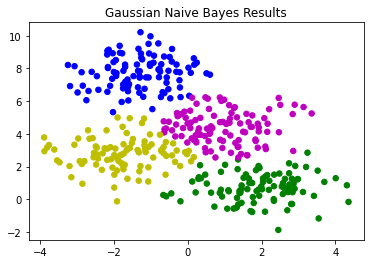

In [4]:
# YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB

#1. specify the model as Gaussian Naive Bayes
model = GaussianNB() 

#2. choose hyperparameteres as X and y_true
#3. data (X) is already arranged into a features matrix 

#4. fit the model to data
model.fit(X, y_true); 

#5. apply model to new data (still X) 
y_predicted = model.predict(X)

#Plot predicted results as scatterplot 
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = [colors[y_predicted[i]] for i in range(len(y_predicted))], s=30)
ax.set_title("Gaussian Naive Bayes Results");


(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from (b)) to the true labels ```y_true```. Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the Gaussian Naive Bayes algorithm?

(86.66666666666667, 95.0, 91.57894736842105, 97.0)

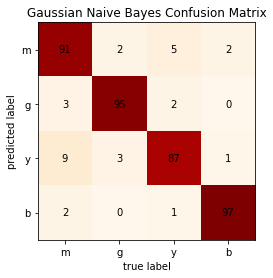

In [5]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix 

#create confusion matrix
mat = confusion_matrix(y_true = y_true, y_pred = y_predicted)

#include plot details
fig, ax = plt.subplots()
ax.imshow(mat, cmap = "OrRd")
ax.set_xticks(np.arange(len(colors)))
ax.set_yticks(np.arange(len(colors)))
ax.set_xticklabels(colors)
ax.set_yticklabels(colors)
ax.set_xlabel('true label')   # label axes
ax.set_ylabel('predicted label')
ax.set_title("Gaussian Naive Bayes Confusion Matrix");

#loop through to add counts for each intersection 
for i in range(len(colors)):
    for j in range(len(colors)):
        text = ax.text(j, i, mat[i,j], ha = "center", va = "center", color = "k")

#compute percentage of correctly predicted results 
#true labels: down each column 
#predicted labels: across each row
m_cor = (mat[0,0]/sum(mat[:,0]))*100
g_cor = (mat[1,1]/sum(mat[:,1]))*100
y_cor = (mat[2,2]/sum(mat[:,2]))*100
b_cor = (mat[3,3]/sum(mat[:,3]))*100

m_cor, g_cor, y_cor, b_cor

The percentage of points that are correctly predicted for magenta, green, yellow, and blue are 86.67%, 95%, 91.58%, and 97% respectively.

## Problem 2

(a) Use SciKit-Learn to apply the k-means clustering algorithm (with k=4) to only the ```X``` matrix of the simulated data. For the resulting four clusters, use a majority vote over the true ```y_true``` labels to assign each cluster a label. 

**Hint:** we did something extremely similar in the clustering/classification of handwritten digits example we did in class. 

In [6]:
# YOUR CODE HERE
from sklearn.cluster import KMeans #1. choose class of models kmeans 
from scipy.stats import mode


kmeans = KMeans(n_clusters = 4) #2. Specify hyperparameter (clusters = 4)
                                #3. already handled
clusters = kmeans.fit_predict(X)#4 and 5. fit model and predict

#apply majority vote over the true y_true labels 
labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters==i)
    labels[mask] = mode(y_true[mask])[0]


(b) Produce another scatterplot showing the 400 points in ```X``` and use the labels produced in Problem 2 (a) to color the points. 

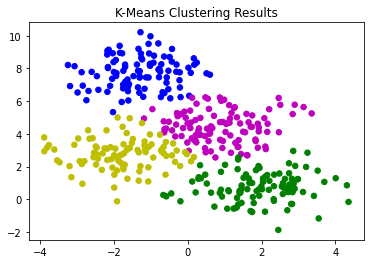

In [7]:
# YOUR CODE HERE

#plot cluster results with labels assigned to each cluster
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = [colors[labels[i]] for i in range(len(y_true))], s=30)
ax.set_title("K-Means Clustering Results");

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 2 (b)) to the true labels ```y_true```.  Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the k-means algorithm (with following majority vote over true labels)?

(84.90566037735849, 94.11764705882352, 92.47311827956989, 96.96969696969697)

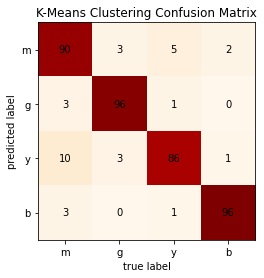

In [8]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix 

#create confusion matrix
mat2 = confusion_matrix(y_true = y_true, y_pred = labels)

#include plot details
fig, ax = plt.subplots()
ax.imshow(mat, cmap = "OrRd")
ax.set_xticks(np.arange(len(colors)))
ax.set_yticks(np.arange(len(colors)))
ax.set_xticklabels(colors)
ax.set_yticklabels(colors)
ax.set_xlabel('true label')     # label axes
ax.set_ylabel('predicted label')
ax.set_title("K-Means Clustering Confusion Matrix");


#loop through to add counts for each intersection 
for i in range(len(colors)):
    for j in range(len(colors)):
        text = ax.text(j, i, mat2[i,j], ha = "center", va = "center", color = "k")
        
#compute percentage of correctly predicted results 
#true labels: down each column 
#predicted labels: across each row
m_cor = (mat2[0,0]/sum(mat2[:,0]))*100
g_cor = (mat2[1,1]/sum(mat2[:,1]))*100
y_cor = (mat2[2,2]/sum(mat2[:,2]))*100
b_cor = (mat2[3,3]/sum(mat2[:,3]))*100

m_cor, g_cor, y_cor, b_cor


The percentage of points that are correctly predicted by the k-means algorithm with the majority vote rule for magenta, green, yellow, and blue are 84.91%, 94.30%, 92.47%, and 96.97% respectively. 

## Problem 3

(a) Use SciKit-Learn to fit a decision tree to the simulated data ```(X,y_true)```. Set the ```max_depth``` of the tree to 3 (to make three nodes in your tree and end up with four different "leaves" on your tree).

In [9]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier #1. choose class of models: binary decision tree

tree = DecisionTreeClassifier(max_depth=3) #2. specify hyperparameter
tree.fit(X, y_true) #3. already handled #4. fit model
result = tree.predict(X) #5. predict

(b) Produce another scatterplot showing the 400 points in ```X``` and use the labels produced by the Decision Tree procedure in Problem 4 (a) to color the points. 

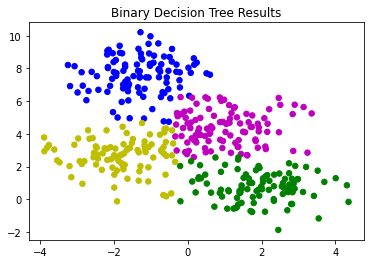

In [10]:
# YOUR CODE HERE

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c = [colors[result[i]] for i in range(len(result))], s=30)
ax.set_title("Binary Decision Tree Results");

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 4 (a)) to the true labels ```y_true``` from Problem 1. Which percentage of points are predicted correctly by the decision tree? Display your confusion matrix as a heat map like we did in class. 

(89.42307692307693, 97.0, 97.82608695652173, 94.23076923076923)

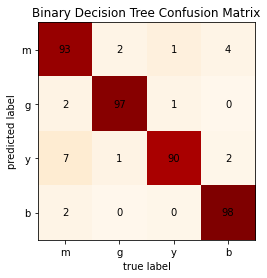

In [11]:
# YOUR CODE HERE

#create confusion matrix
mat3 = confusion_matrix(y_true = y_true, y_pred = result)

#include plot details
fig, ax = plt.subplots()
ax.imshow(mat, cmap = "OrRd")
ax.set_xticks(np.arange(len(colors)))
ax.set_yticks(np.arange(len(colors)))
ax.set_xticklabels(colors)
ax.set_yticklabels(colors)
ax.set_xlabel('true label')     # label axes
ax.set_ylabel('predicted label')
ax.set_title("Binary Decision Tree Confusion Matrix");


#loop through to add counts for each intersection 
for i in range(len(colors)):
    for j in range(len(colors)):
        text = ax.text(j, i, mat3[i,j], ha = "center", va = "center", color = "k")
       
       
#compute percentage of correctly predicted results 
#true labels: down each column 
#predicted labels: across each row
m_cor = (mat3[0,0]/sum(mat3[:,0]))*100
g_cor = (mat3[1,1]/sum(mat3[:,1]))*100
y_cor = (mat3[2,2]/sum(mat3[:,2]))*100
b_cor = (mat3[3,3]/sum(mat3[:,3]))*100

m_cor, g_cor, y_cor, b_cor



The percentage of points that are correctly predicted by the binary decision tree algorithm for magenta, green, yellow, and blue are 89.42%, 97%, 97.83%, and 94.23% respectively. 

## Problem 4

Describe what differences you observe between the three different methods you applied. What differences can you see in the three scatter plots in terms of shapes of predicted point clouds? Which method seems to "best" represent the four original groups? In which sense is the separation into original groups the best? Explain. 

1. In each of the three methods, the overall shape of the predict outcomes are mostly similar to the true labels. There is a clear separation of groups among the 3 methods. However, there are very slight differences in the edges/borderlines of each group. There are subtle misclassifications of data points near the edges between neighboring groups.  
2. For example, the naive bayes method classified more data points magenta than yellow near the borderline of the two groups. Sparse data points that were truly yellow were classified as blue, magenta, and green instead. 
3. As for the k-means method, there is also a clear distinction of four groups. Original yellow data points are have taken on other groups as well. However, I've noticed that there are slightly more magenta data points near the edge of blue group. Similarly, there are more slightly more green data points near the borderlines of the magenta and yellow groups. 
4. For the binary decision tree method, there are more blue points neighboring the yellow group. There are also more magenta ponts than blue near their borders. 
5. The method that seems to "best" represent the four original groups is the binary decision tree. According to the confusion matrix, 89% of magenta points were correctly classified. In k-means and naive bayes, the percentages were 84% and 86% respectively. The binary decision tree also resulted in the highest percentage of correctly classified green and yellow points at 97% and 97.83% respectively. The percentage of correctly classified blue points is 94%, which is the lowest out of the three methods. However, this is a small trade-off since 94% is still accurate and the results for the other three groups were the best.  